In [26]:
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Load Dataset

In [6]:
X_train = np.loadtxt('input.csv' , delimiter=',')
Y_train = np.loadtxt('labels.csv' , delimiter=',')

X_test = np.loadtxt('input_test.csv' , delimiter=',')
Y_test = np.loadtxt('labels_test.csv' , delimiter=',')

In [7]:
X_train = X_train.reshape(len(X_train), 100, 100, 3)
Y_train = Y_train.reshape(len(Y_train), 1)

X_test = X_test.reshape(len(X_test), 100, 100, 3)
Y_test = Y_test.reshape(len(Y_test), 1)

X_train = X_train/255.0
X_test = X_test/255.0

In [8]:
print('Shape of X_train' , X_train.shape)
print('Shape of Y_train' , Y_train.shape)
print('Shape of X_test' , X_test.shape)
print('Shape of Y_test' , Y_test.shape)

Shape of X_train (2000, 100, 100, 3)
Shape of Y_train (2000, 1)
Shape of X_test (400, 100, 100, 3)
Shape of Y_test (400, 1)


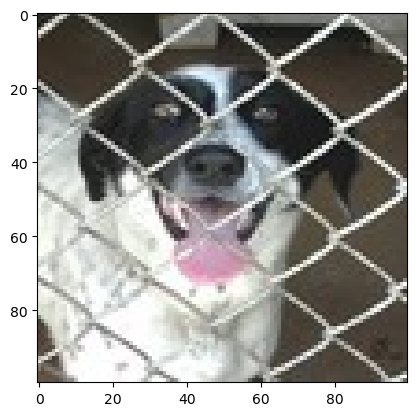

In [9]:
idx = random.randint(0, len(X_train))
plt.imshow(X_train[idx, :])
plt.show()

# Model

In [33]:
mobile_model = MobileNet(weights='imagenet', include_top=False, input_shape=(100, 100, 3))

In [34]:
for layer in mobile_model.layers:
    layer.trainable = False

In [35]:
model = Sequential()

In [36]:
model.add(mobile_model)

In [37]:
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [38]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

In [39]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

In [40]:
model.fit(X_train, Y_train, epochs=10, batch_size=32, callbacks=[es], validation_split=0.2)

Epoch 1/10
50/50 [==============================] - 12s 195ms/step - loss: 0.5895 - accuracy: 0.8719 - val_loss: 0.7024 - val_accuracy: 0.8400
Epoch 2/10
50/50 [==============================] - 9s 181ms/step - loss: 0.0595 - accuracy: 0.9787 - val_loss: 0.4046 - val_accuracy: 0.8775
Epoch 3/10
50/50 [==============================] - 9s 174ms/step - loss: 0.0096 - accuracy: 0.9987 - val_loss: 0.3586 - val_accuracy: 0.8875
Epoch 4/10
50/50 [==============================] - 9s 177ms/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 0.4731 - val_accuracy: 0.8700
Epoch 5/10
50/50 [==============================] - 9s 179ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.5211 - val_accuracy: 0.8650
Epoch 6/10
50/50 [==============================] - 9s 190ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.4819 - val_accuracy: 0.8700
Epoch 7/10
50/50 [==============================] - 9s 181ms/step - loss: 8.9336e-04 - accuracy: 1.0000 - val_loss: 0.5117 - val_accuracy: 0.8675
E

In [41]:
model.evaluate(X_test, Y_test)

13/13 [==============================] - 2s 115ms/step - loss: 0.3452 - accuracy: 0.9100


[0.34520870447158813, 0.9100000262260437]

# Model Predictions

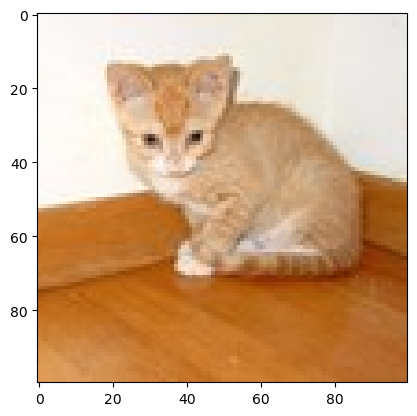

1/1 [==============================] - 0s 53ms/step
Our model says it is a : cat


In [50]:
idx2 = random.randint(0, len(Y_test))
plt.imshow(X_test[idx2, :])
plt.show()

y_pred = model.predict(X_test[idx2, :].reshape(1, 100, 100, 3))
y_pred = y_pred > 0.5

if(y_pred == 0):
    pred = 'dog'
else:
    pred = 'cat'
    
print("Our model says it is a :", pred)